In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
# to share the GPU resources for multiple sessions
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True # dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

%matplotlib inline

2022-09-30 11:29:55.790099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 11:29:55.796725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:55.803955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:55.804121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GRID A100D-16C, pci bus id: 0000:02:00.0, compute capability: 8.0



2022-09-30 11:29:56.381631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:56.381795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:56.381909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:56.381997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11137 MB memory:  -> device: 0, name: GRID A100D-16C, pci bus id: 0000:02:00.0, compute capability: 8.0


**Dataset Download Link**
[https://drive.google.com/file/d/1ULKLK_R0qsLho6PzfUIOwTXOStk3w5jd/view?usp=sharing](https://drive.google.com/file/d/1ULKLK_R0qsLho6PzfUIOwTXOStk3w5jd/view?usp=sharing)

In [2]:
# Upload this file to your google drive

In [3]:
# for college server
my_data_dir = '/home/ailab/hdd/dataset/cell_images'

In [4]:
os.listdir(my_data_dir)

['train', 'test', '.ipynb_checkpoints']

In [5]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
len(os.listdir(train_path+'/uninfected/'))

12479

In [8]:
len(os.listdir(train_path+'/parasitized/'))

12480

In [9]:
os.listdir(train_path+'/parasitized')[0]

'C101P62ThinF_IMG_20150923_165215_cell_7.png'

In [10]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])

In [11]:
para_img.shape

(205, 184, 3)

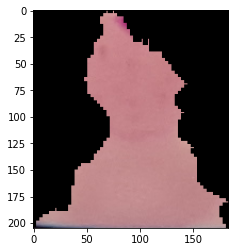

In [12]:
plt.imshow(para_img)

In [13]:
# Checking the image dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

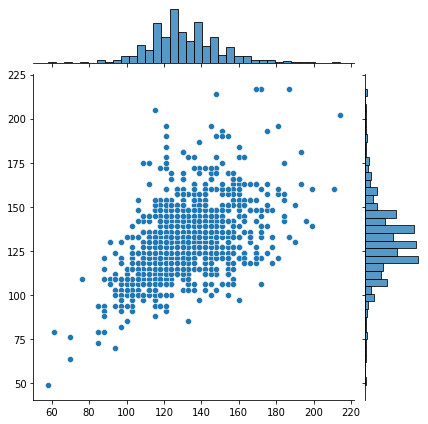

In [14]:
sns.jointplot(x=dim1,y=dim2)

In [15]:
image_shape = (130,130,3)

In [16]:
# help(ImageDataGenerator)

In [17]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [18]:
image_gen.flow_from_directory(train_path)

Found 24961 images belonging to 2 classes.


In [19]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [20]:
model = models.Sequential()
model.add(layers.Input(shape=(130,130,3))) 
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu')) 
 
model.add(layers.Dense(1, activation ='sigmoid'))
model.summary()

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 65, 65, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1

2022-09-30 11:29:58.243552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:58.243755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:58.243847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:58.244374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 11:29:58.244491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 65, 65, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [22]:
batch_size = 16

In [23]:
# help(image_gen.flow_from_directory)

In [24]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24961 images belonging to 2 classes.


In [25]:
train_image_gen.batch_size

16

In [26]:
len(train_image_gen.classes)

24961

In [27]:
train_image_gen.total_batches_seen

0

In [28]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle = False)

Found 2600 images belonging to 2 classes.


In [29]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [30]:
results = model.fit(train_image_gen,epochs=10,validation_data=test_image_gen)

Epoch 1/10


2022-09-30 11:30:00.016000: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-09-30 11:30:01.539876: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1561/1561 [==============================] - 102s 63ms/step - loss: 0.3834 - accuracy: 0.8335 - val_loss: 0.2711 - val_accuracy: 0.9023
Epoch 2/10
1561/1561 [==============================] - 98s 63ms/step - loss: 0.2555 - accuracy: 0.8979 - val_loss: 0.3032 - val_accuracy: 0.8912
Epoch 3/10
1561/1561 [==============================] - 99s 63ms/step - loss: 0.2203 - accuracy: 0.9233 - val_loss: 0.2029 - val_accuracy: 0.9254
Epoch 4/10
1561/1561 [==============================] - 99s 64ms/step - loss: 0.2004 - accuracy: 0.9325 - val_loss: 0.2022 - val_accuracy: 0.9362
Epoch 5/10
1561/1561 [==============================] - 99s 63ms/step - loss: 0.1896 - accuracy: 0.9365 - val_loss: 0.1942 - val_accuracy: 0.9296
Epoch 6/10
1561/1561 [==============================] - 98s 63ms/step - loss: 0.1815 - accuracy: 0.9384 - val_loss: 0.2004 - val_accuracy: 0.9373
Epoch 7/10
1561/1561 [==============================] - 98s 63ms/step - loss: 0.1780 - accuracy: 0.9431 - val_loss: 0.1696 - val_accur

In [31]:
model.save('cell_model.h5')

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

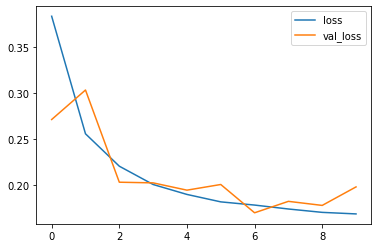

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(test_image_gen)

163/163 [==============================] - 9s 57ms/step - loss: 0.2007 - accuracy: 0.9388


[0.2007383406162262, 0.9388461709022522]

In [36]:
pred_probabilities = model.predict(test_image_gen)

163/163 [==============================] - 9s 57ms/step


In [37]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [38]:
predictions = pred_probabilities > 0.5

In [39]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [40]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1171,  129],
       [  34, 1266]])